# Logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#위스콘신 유방암 데이터
cancer = load_breast_cancer()

#내장 데이터 셋 데이터프레임으로 만듬
cancerDF = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancerDF['target'] = cancer.target

In [2]:
cancerDF.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
#데이터 요약정보
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
#레이블 target안의 class 종류와 해당 개수 확인

cancerDF['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: >

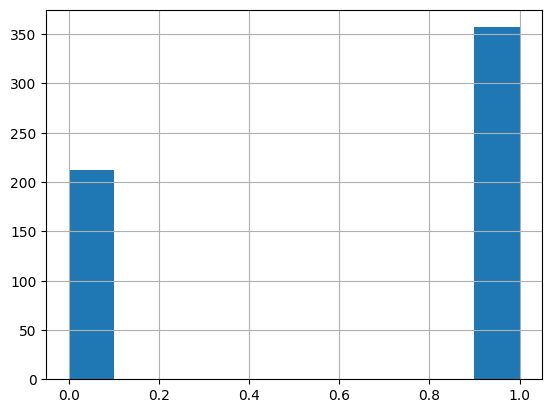

In [5]:
#히스토그램
cancerDF['target'].hist()

In [6]:
#통계정보 확인
cancerDF.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
cancerDF.describe().T # 전치 행렬

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


> * mean area피처의 경우 max가 2500정도이고,
> * symmetry error피처의 경우 소수점 둘째자리 수도 가지고 있다. 
> * 각 피처마다 데이터 분포가 달라서 전반적으로 스케일링이 필요할 것으로 보임

## 데이터 전처리

In [9]:
cancerDF.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler

#로지스틱회귀의 경우 StandardScaler로 진행해주는 것이 좋다. 
# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
scaler.fit(cancer.data)
cancer_scaled = scaler.transform(cancer.data)
cancer_scaled_df = pd.DataFrame(data=cancer_scaled, columns=cancer.feature_names)


In [11]:
cancer_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-3.153111e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean texture,569.0,-6.568462e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean perimeter,569.0,-6.993039e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean area,569.0,-8.553985e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean smoothness,569.0,6.081447e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
mean compactness,569.0,-1.136369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
mean concavity,569.0,-2.997017e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
mean concave points,569.0,1.023981e-15,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
mean symmetry,569.0,-1.860648e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
mean fractal dimension,569.0,-1.504752e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


## 데이터 셋 준비

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#데이터 분할
X_train , X_test, y_train , y_test = train_test_split( cancer_scaled, cancer.target, test_size=0.3, random_state=0)

In [13]:
type(X_train),type(X_test),type(y_train),type(y_test)


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


## 모델 학습

In [15]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train,y_train)

# 예측
pred = lr_clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [16]:
lr_clf.predict_proba(X_test) #예측 확률


array([[9.98645694e-01, 1.35430649e-03],
       [3.84282175e-02, 9.61571783e-01],
       [1.30562858e-03, 9.98694371e-01],
       [1.03849030e-02, 9.89615097e-01],
       [2.45997949e-04, 9.99754002e-01],
       [5.90660606e-03, 9.94093394e-01],
       [1.53858124e-04, 9.99846142e-01],
       [1.66513655e-03, 9.98334863e-01],
       [8.61333455e-05, 9.99913867e-01],
       [2.37564216e-06, 9.99997624e-01],
       [2.14530404e-01, 7.85469596e-01],
       [7.58383388e-02, 9.24161661e-01],
       [1.57971029e-05, 9.99984203e-01],
       [4.78248412e-01, 5.21751588e-01],
       [4.37381550e-01, 5.62618450e-01],
       [9.95842423e-01, 4.15757735e-03],
       [6.20911666e-03, 9.93790883e-01],
       [9.99995710e-01, 4.28969606e-06],
       [9.99900609e-01, 9.93913010e-05],
       [9.99999997e-01, 3.12772905e-09],
       [9.98584477e-01, 1.41552273e-03],
       [9.79628053e-01, 2.03719470e-02],
       [1.98566406e-02, 9.80143359e-01],
       [1.26199951e-03, 9.98738000e-01],
       [9.990851

## 평가하기

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


In [19]:

#실제값, 예측값

get_clf_eval(y_test, pred)

오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907, F1:0.9817


> * 정확도가 97.6%로 성능이 좋은 편입니다. 
> * 하지만 좀 더 성능을 높여 봅시다.


## 하이퍼파라미터 튜닝

In [20]:
from sklearn.model_selection import GridSearchCV

# - 'newton-cg'   -   ['l2', 'none']
# - 'lbfgs'       -   ['l2', 'none']
# - 'liblinear'   -   ['l1', 'l2']
# - 'sag'         -   ['l2', 'none']
# - 'saga'        -   ['elasticnet', 'l1', 'l2', 'none']

params={'solver':['liblinear'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]} #규제 강도: 높은 강도에서 작은 강도로


grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.985


In [21]:
 #최적의 파라미터를 가진 분류기
best_clf = grid_clf.best_estimator_

 #예측
pred = best_clf.predict(X_test)

#평가
get_clf_eval(y_test,pred)

오차 행렬
[[ 61   2]
 [  1 107]]
정확도: 0.9825, 정밀도: 0.9817, 재현율: 0.9907, F1:0.9862


> * LogisticRegression만 사용했을 때는 default 하이퍼파라미터를 기준으로 학습을 합니다. 
> * 그 결과, 정확도는 97.6% 성능을 보였고,
> * GridSearchCV와 결합하여 하이퍼파라미터 튜닝을 통하면
> * 정확도가 98.2%로 약간의 성능 향상을 볼 수 있습니다. 
